<a href="https://colab.research.google.com/github/nkmah2/Deep-Learning/blob/master/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# DL      
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



**Import the data** 

In [101]:
# import the data
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url,sep=',',header=None)
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']


In [102]:
print(data.shape)
data


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [103]:
# Drop all the rows with ? and drop rows with nans
data = data.replace('?',np.nan).dropna()
print(data.shape)

(297, 14)


In [104]:
data['DISEASE'].value_counts()


0    160
1     54
2     35
3     35
4     13
Name: DISEASE, dtype: int64

In [105]:
# We set all values >=1 to 1 - the data is more balanced now
data['DISEASE'][data['DISEASE']>0] =1

In [106]:
data['DISEASE'].value_counts()

0    160
1    137
Name: DISEASE, dtype: int64

In [107]:
#Data distribution
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,DISEASE
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


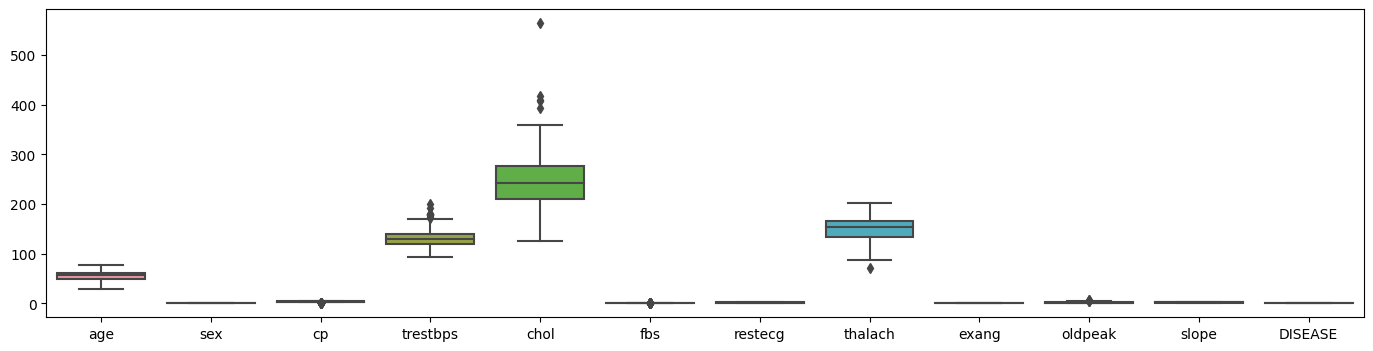

In [108]:
fig, ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()


In [109]:
# Use z-score to rescale the distribution

myColsNames = data.keys()
updatedColNames =myColsNames.drop(['sex','fbs','DISEASE','exang'])

print(updatedColNames)

for n in updatedColNames:
  colData = pd.to_numeric(data[n])
  data[n] = (colData - np.mean(colData)) / np.std(colData)




Index(['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


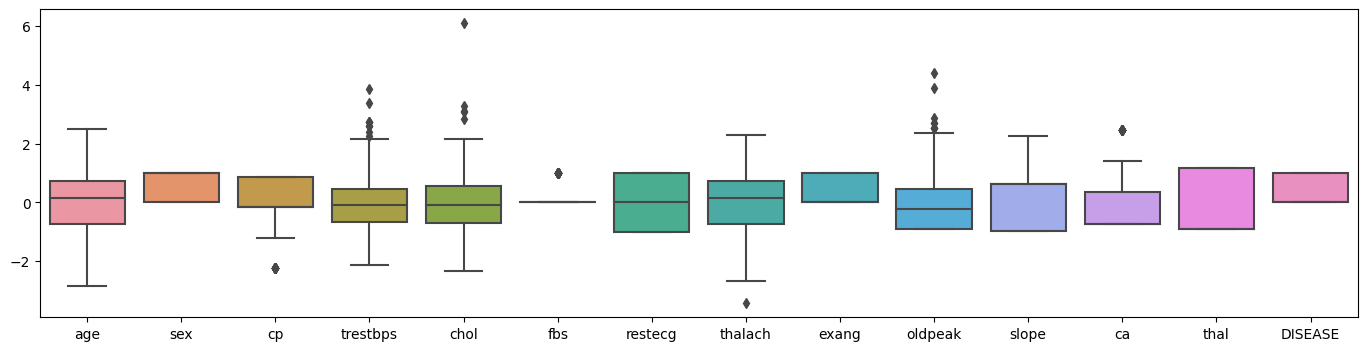

In [110]:
fig, ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

In [111]:
col2zscore = data.keys()
col2zscore = col2zscore.drop('DISEASE')


dataT = torch.tensor(data[col2zscore].values).float()
labels = torch.tensor(data['DISEASE'].values).float()
labels = labels[:,None] # transform the matrix

In [112]:
train_data,test_data, train_labels,test_labels = train_test_split(dataT,labels,test_size=0.1)

train_data = TensorDataset(train_data,train_labels)
test_data = TensorDataset(test_data,test_labels)


batchSize = 16
train_loader = DataLoader(train_data,batch_size=batchSize,shuffle=True,drop_last=True)
test_loader = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])




In [113]:
# Check the size of the data batches

for x,y in train_loader:
  print(x.shape,y.shape)

torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])
torch.Size([16, 13]) torch.Size([16, 1])


In [114]:
# get number of high/low quality wines
heartDiseaseRatings = train_loader.dataset.tensors[1].detach()
print('%s No heart disease' %torch.sum(heartDiseaseRatings==0).item())
print('%s Heart disease' %torch.sum(heartDiseaseRatings==1).item())

146 No heart disease
121 Heart disease


In [132]:
# The DL section

class HeartDiseaseNN(nn.Module):
  def __init__(self):
    super().__init__()

    # input layer
    self.input = nn.Linear(13,64)

    # hidden layer
    self.fc1 = nn.Linear(64,32)
    self.fc2 = nn.Linear(32,64)

    #outout
    self.output = nn.Linear(64,1)

  def forward(self,x):
    x = F.relu(self.input(x)) # leaky relu just for a change
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.output(x)

      

In [133]:
from colorsys import yiq_to_rgb
# Test the model using some data from the training set
# test the model on a bit of data
testNet = HeartDiseaseNN()

X,y = next(iter(train_loader))
y_hat = testNet(X)
print(y_hat) 

#Compute Loss
lossFun = nn.BCEWithLogitsLoss()
lossFun(y,y_hat)

tensor([[0.0836],
        [0.1121],
        [0.1044],
        [0.1027],
        [0.0993],
        [0.0882],
        [0.1020],
        [0.1182],
        [0.0916],
        [0.0782],
        [0.0901],
        [0.0936],
        [0.0991],
        [0.1053],
        [0.1349],
        [0.1140]], grad_fn=<AddmmBackward0>)


tensor(1.0189, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [134]:
# start with a fresh network
net = HeartDiseaseNN()
optimizer = torch.optim.Adam(net.parameters(),lr=.00005)
lossfun = nn.BCEWithLogitsLoss() # try with different loss function


# number of training epochs
numepochs = 150


# initialize losses and accuracies
trainLoss = torch.zeros(numepochs)
testLoss  = torch.zeros(numepochs)
trainAcc  = torch.zeros(numepochs)
testAcc   = torch.zeros(numepochs)


# loop over epochs
for epochi in range(numepochs):

  # loop over training data batches
  batchLoss = []
  for X,y in train_loader:

    # forward pass and loss
    yHat = net(X)
    loss = lossfun(yHat,y)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss from this batch
    batchLoss.append(loss.item())
    
    # train accuracy
    predictions = (torch.sigmoid(yHat)>.5).float()
    trainAcc[epochi] = 100*torch.mean((predictions==y).float())

  # end of batch loop...

  # get average losses across the batches
  trainLoss[epochi] = np.mean(batchLoss)


  ## now for the test
  X,y = next(iter(test_loader))
  yHat = net(X)
  
  # test loss
  loss = lossfun(yHat,y)
  testLoss[epochi] = loss.item()
  
  # test accuracy
  predictions = (torch.sigmoid(yHat)>.5).float()
  testAcc[epochi] = 100*torch.mean((predictions==y).float())

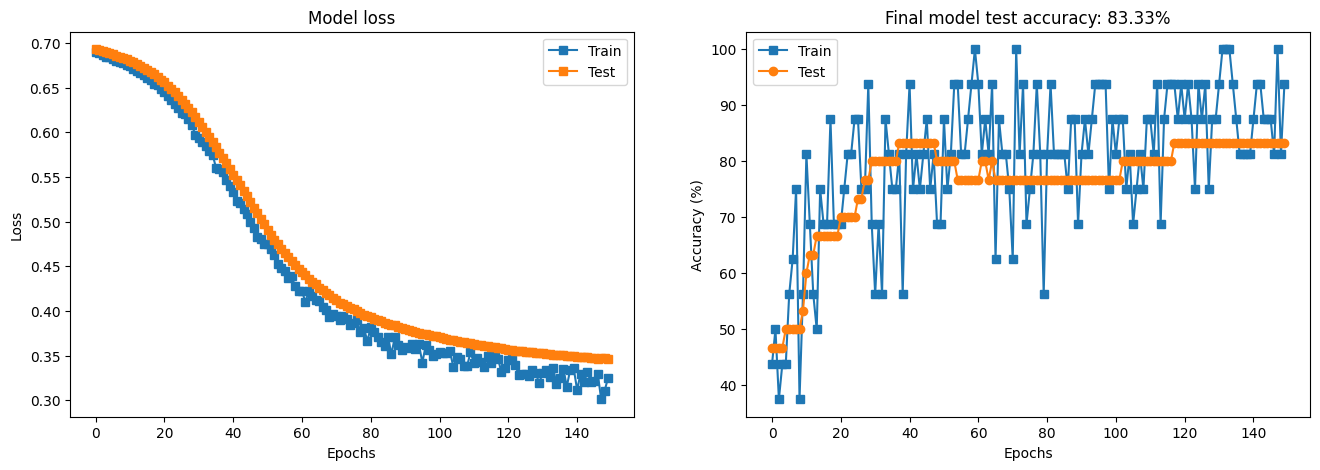

In [135]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(trainLoss,'s-',label='Train')
ax[0].plot(testLoss,'s-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend()

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()


In [119]:
# References:
#TEACHER: Mike X Cohen, sincxpress.com
#COURSE URL: udemy.com/course/deeplearning_x/